0.04023725180525971
CPU Time for training: 0.005072593688964844 seconds
CPU Time for prediction: 0.001989126205444336 seconds



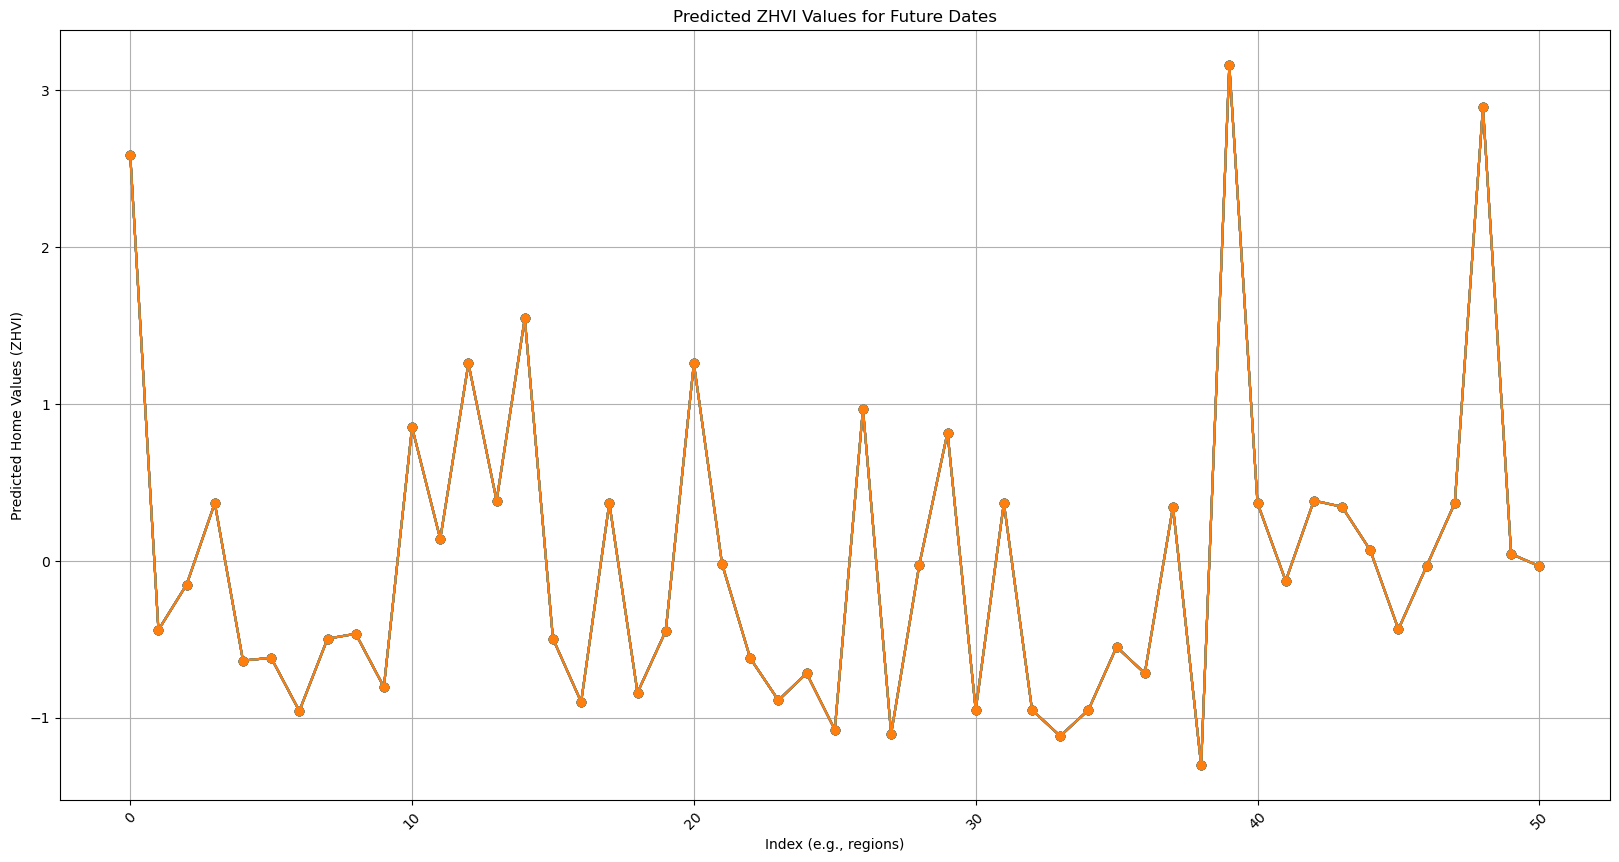

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler 
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



realEstateData = pd.read_csv('Zillow Real Estate Data.csv')
# Drop the 'StateName' column since the data is not needed for the linear regression algorithm
realEstateData.drop(columns=['StateName'], inplace=True)

#this creates a numeric_columns variable that receives 
numeric_columns = realEstateData.select_dtypes(include='number').columns

# this excludes the size rank and region column so that the values aren't converted when standardized
# Standardizing the data is important so that when linear regression is applied, the values will be in the same range
# for accurate results

exclude_columns = ['SizeRank', 'RegionID']
zhvi_columns = [col for col in numeric_columns if col not in exclude_columns]

# Fill missing values for ZHVI columns with the mean
realEstateData[zhvi_columns] = realEstateData[zhvi_columns].fillna(realEstateData[zhvi_columns].mean())

scaler = StandardScaler()
realEstateData[zhvi_columns] = scaler.fit_transform(realEstateData[zhvi_columns])

future_date = '6/30/2020'

y = realEstateData[future_date]
x = realEstateData.drop(columns=['1/31/2000', 'SizeRank', 'RegionID', 'RegionName', 'RegionType',future_date])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

data_model = DecisionTreeRegressor()
data_model.fit(x_train, y_train)


y_prediction = data_model.predict(x_test)
#print(y_prediction)

y_train_prediction = data_model.predict(x_train)


future_dates = ['1/31/2025', '2/28/2025', '3/31/2025', '4/30/2025', '5/31/2025', '6/30/2025', 
                '7/31/2025', '8/31/2025', '9/30/2025', '10/31/2025', '11/30/2025', '12/31/2025']

new_dataframe = realEstateData.copy()



for date in future_dates:
    # Make predictions using only the original features (zhvi_columns) from the data, excluding the future date columns
    new_dataframe[date] = data_model.predict(x)
    
mse = mean_squared_error(y_test, y_prediction)
print(mse)
start_time_train = time.time()
data_model.fit(x_train, y_train)
end_time_train = time.time()

cpu_time_train = end_time_train - start_time_train
print(f'CPU Time for training: {cpu_time_train} seconds')

# Measure wall-clock time for predicting
start_time_predict = time.time()
y_prediction = data_model.predict(x_test)
end_time_predict = time.time()

cpu_time_predict = end_time_predict - start_time_predict
print(f'CPU Time for prediction: {cpu_time_predict} seconds')
print()
#y_train_prediction = data_model.predict(x_train)

# Calculate MSE for the training set
#mse_train = mean_squared_error(y_train, y_train_prediction)
#print("Mean Squared Error for training set:", mse_train)

# Print the predicted ZHVI values for 2025
#print("Predicted ZHVI values for 2025:")
#print(new_dataframe[future_dates])
#print(realEstateData.head())
#plt.figure(figsize=(20, 10))
#plot_tree(data_model, filled = True, feature_names = x.columns, fontsize = 6)
#plt.savefig('decision_tree.png', bbox_inches='tight')
#plt.show()
#plt.close()

plt.figure(figsize=(20, 10))
for date in future_dates:
    plt.plot(new_dataframe.index, new_dataframe[date], marker='o', label=f'Predicted {date}')

# Add labels and title
plt.xlabel('Index (e.g., regions)')
plt.ylabel('Predicted Home Values (ZHVI)')
plt.title('Predicted ZHVI Values for Future Dates')


# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to differentiate between the dates
plt.legend()

# Show grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

